# Importing Packages

In [1]:
import numpy as np                                               #support for multi-dimensional arrays or matrices
import pandas as pd                                              
from math import sqrt                                            
import matplotlib.pyplot as plt                                  
from sklearn.linear_model import LinearRegression                
from sklearn.model_selection import train_test_split             
from sklearn.metrics import mean_squared_error                   

# Reading and Manipulating data

In [2]:
data = pd.read_csv("energydata_complete.csv")
data = data.drop(["date","rv1","rv2","lights"], axis=1)

# Splitting data into test and train

In [3]:
train, test = train_test_split(data, test_size=0.25, random_state=0)

train_X = train.drop("Appliances", axis=1)
train_Y = train["Appliances"]

test_X = test.drop("Appliances", axis=1)
test_Y = test["Appliances"]

# Training data

In [4]:
model = LinearRegression()
model.fit(train_X, train_Y)

print (model.coef_)

[  0.77689933  15.73773644 -18.74873005 -13.8907279   26.20378104
   5.18420629   1.27475863   1.42128336   0.61680519   0.23159407
   7.34611113   0.33813314   1.52338849  -1.53505008   9.55452905
  -6.23917282 -22.9622048   -1.57895237 -10.57159829   0.20347095
  -0.90678546   2.05187632   0.1954646    5.45302315]


# Predicting and Plotting

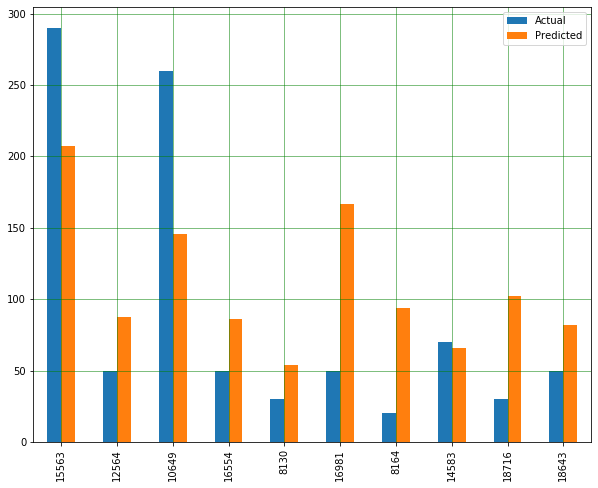

In [5]:
df_res = pd.DataFrame({'Actual': test_Y, 'Predicted': model.predict(test_X)})
df_res1 = df_res.head(10)

df_res1.plot (kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Using metrics for evaluation

In [6]:
print (model.score(test_X, test_Y))
rmse = sqrt(mean_squared_error(test_Y,model.predict(test_X)))
print (rmse)

0.12955383889207084
99.06010150032678
